# Линейная алгебра. Лабораторная работа 1, осень 2024


## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется по умолчанию *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://numpy.org/doc/stable/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать, аналогичных slicing для списков базового Python, но отчасти расширяющих их (при желании см. [документацию](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing)):
- элемент с номером `(i,j)`: `A[i,j]`; <small>*работает и `A[i][j]`, но менее эффективно (создаётся промежуточный одномерный массив `A[i]`, прежде чем взять из него j-й элемент)*</small>
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

Обратите внимание, что эти методы как правило возвращают view, а не copy (<small>*есть исключения, при желании см. [advanced-indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)*</small>), то есть если, например, изменить что-то в `A[i, :]`, то изменится исходная матрица `A`.

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. <small>*Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`. Не путать с `sla.expm(A)` – настоящей матричной экспонентой.*</small>

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.25 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте нулевую матрицу $Y$ размера $4\times1$ и найдите произведение $ZY$;

- создайте диагональную матрицу $D$ размера $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след $\operatorname{tr}(D)$ (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу $D^{-1}$;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте выводить результаты.

In [ ]:
# Your code here

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете. Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками.

**Задание 2.1 [0.1 балла]**
Для разминки реализуйте одно элементарное преобразование: прибавьте третью строку данной матрицы ко второй с коэффициентом 3. Не используйте циклов; для естественного решения достаточно одной строки.

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
# Your code here
print(A)

**Задание 2.2 [0.2 балла]** Теперь напишите функцию, принимающую на вход матрицу и находящую номер первого слева ненулевого столбца. Предусмотрите случай, что на вход подана нулевая матрица (например, удобно вывести ответ «-1» в таком случае).

In [ ]:
def find_first_nonzero_column (A):
  # Your code here
  return k

In [ ]:
# Test cases
A1 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A1: {find_first_nonzero_column(A1)}")  # Expected output: 2

A2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A2: {find_first_nonzero_column(A2)}")  # Expected output: -1

A3 = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A3: {find_first_nonzero_column(A3)}")  # Expected output: 1

A4 = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A4: {find_first_nonzero_column(A4)}")  # Expected output: 0

A5 = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"First non-zero column of A5: {find_first_nonzero_column(A5)}") # Expected output: 0

**Задание 2.3 [0.3 балла]** Теперь напишите функцию, меняющую при необходимости строки матрицы местами так, чтобы в первом ненулевом столбце на первом месте было ненулевое число. Функция должна изменять исходную матрицу и возвращать число $\pm 1$ в зависимости от того, был ли произведен обмен строк местами.

In [ ]:
def swap_rows_if_needed (A):
  k = find_first_nonzero_column(A)
  if k == -1:
    return 1
  # Your code here

In [ ]:
# Test cases
A1 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A1:\n{A1}")
print(f"swap_rows_if_needed(A1): {swap_rows_if_needed(A1)}") # Expected output: 1
print(f"Modified A1:\n{A1}")

A2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A2:\n{A2}")
print(f"swap_rows_if_needed(A2): {swap_rows_if_needed(A2)}") # Expected output: 1
print(f"Modified A2:\n{A2}")

A3 = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A3:\n{A3}")
print(f"swap_rows_if_needed(A3): {swap_rows_if_needed(A3)}") # Expected output: 1
print(f"Modified A3:\n{A3}")

A4 = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A4:\n{A4}")
print(f"swap_rows_if_needed(A4): {swap_rows_if_needed(A4)}") # Expected output: -1
print(f"Modified A4:\n{A4}")

A5 = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"Original A5:\n{A5}")
print(f"swap_rows_if_needed(A5): {swap_rows_if_needed(A5)}") # Expected output: 1
print(f"Modified A5:\n{A5}")

A6 = np.array([[0,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"Original A6:\n{A6}")
print(f"swap_rows_if_needed(A6): {swap_rows_if_needed(A6)}") # Expected output: -1
print(f"Modified A6:\n{A6}")

print(f"Original slice:\n{A6[1:,1:]}")
print(f"swap_rows_if_needed(A6): {swap_rows_if_needed(A6[1:,1:])}") # Expected output: 1
print(f"Modified slice:\n{A6[1:,1:]}")

**Задание 2.4 [0.4 балла]** Теперь напишите функцию, принимающую на вход матрицу и номер строки $j$, и вычитающую первую строку из $j$-й с некоторым коэффициентом так, чтобы первый ненулевой элемент строки $j$ занулился. Функция должна изменять данную матрицу. Предполагайте данным, что в первой строке содержится в нужном столбце ненулевой элемент.

In [ ]:
def simplify_row (A, j):
  # Your code here

In [ ]:
# Test cases
A1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A1, 1)
print(A1)  # Expected output: [[1,2,3],[0,-3,-6],[7,8,9]]

A2 = np.array([[1, 0, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A2, 1)
print(A2)  # Expected output: [[1,0,3],[0,5,-6],[7,8,9]]

A3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A3, 2)
print(A3)  # Expected output: [[1,2,3],[4,5,6],[0,-6,-12]]

A4 = np.array([[1, 2, 3], [1, 2, 3], [7, 8, 9]], dtype=np.float64)
simplify_row(A4, 1)
print(A4) # Expected output: [[1,2,3],[0,0,0],[7,8,9]]

A5 = np.array([[0, 2, 3], [0, 5, 6], [0, 8, 9]], dtype=np.float64)
simplify_row(A5, 1)
print(A5) # Expected output: [[0,2,3],[0,0,-1.5],[0,8,9]]

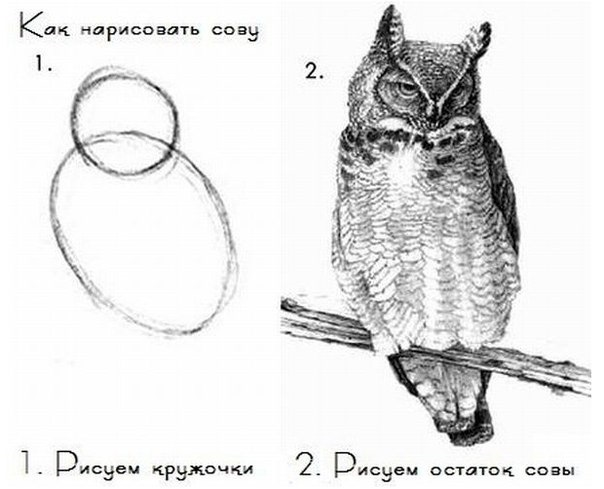

**Задание 2.5 [1 балл]**
Теперь реализуйте функцию `my_det`, вычисляющую определитель. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной. Функция не должна быть деструктивной – исходная матрица не должна измениться.

In [ ]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''

    # Your code here

    return det

Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]], dtype=np.float64)
print(my_det(X))

1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print(X)
        print(my_det(X))
        print(sla.det(X))
        print('FAILED')

[[0.01448566 0.01246844 0.28403418 ... 0.23166346 0.9165174  0.15083651]
 [0.47889171 0.41226065 0.53278383 ... 0.75567679 0.03224117 0.28529529]
 [0.80454753 0.75771761 0.03909919 ... 0.08961897 0.52495256 0.20471031]
 ...
 [0.7617693  0.10818001 0.84337376 ... 0.49180522 0.36681061 0.67475908]
 [0.05749496 0.0408635  0.50487654 ... 0.45931862 0.18595403 0.55807915]
 [0.28028814 0.66759778 0.90609155 ... 0.4596733  0.50827894 0.82022834]]
805472.7183004075
805472.718383495
FAILED
[[0.67771624 0.26194025 0.34778629 ... 0.96080055 0.74910562 0.69747898]
 [0.44893085 0.90334299 0.65381013 ... 0.05906155 0.99039909 0.91813353]
 [0.46645186 0.90787019 0.46140309 ... 0.29839403 0.02886623 0.54173745]
 ...
 [0.2751124  0.69158312 0.38731378 ... 0.82425208 0.99764876 0.65244304]
 [0.88330995 0.00162025 0.78732499 ... 0.93354937 0.62517409 0.28843317]
 [0.10337816 0.64279763 0.48693541 ... 0.05565359 0.70259368 0.09065299]]
-4631835.857009723
-4631835.856986069
FAILED
[[0.97647862 0.51858737 0

KeyboardInterrupt: ignored

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

<small>Обратите внимание на способ сравнения: проверка на точное равенство не подходит из-за машинной точности; см. следующее задание.</small>

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. <small>Вопрос для размышления: зачем запускать много раз, если рассматривать только три из этих запусков?..</small> Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [1 балл]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
# Your code here

И какой из них правильный?

---
**Напишите здесь свой ответ**

**Задание 3.2 [1 балл]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))

    # Your code here

    return P

Можно показать теоретической выкладкой, что её определитель всегда равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
# Your code here

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в numpy лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [1 балл]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
# Your code here

**Задание 4.2 [1.5 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
# Your code here

**Задание 4.3 [1.5 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [ ]:
# Your code here

## Часть 5 (бонус). Метод Гаусса или обратные матрицы?

**Задание 5.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [ ]:
# Your code here